# IS 445 - Final Project
# GENERAL PUBLIC

Some background. I have recently taken a machine learning class and there were many aspects of the course which required visualizations to function. Therefore, I utilized the same dataset repository they used for their homework demonstrations in this project. I also have nightmares cleaning data from poorly maintained CSV files from STAT 107, and the datasets on the UC Irvine Repo are well manicured and proven to function. These datasets are also used on the most widely available Python machine learning library, sklearn, which allowed me to import the dataset without the need to download it. While in the context of this project it may not be useful, this allows any code to run on the dataset even without a local copy of it.

## Dataset Information

Link: https://archive.ics.uci.edu/dataset/53/iris

Home Repo: https://archive.ics.uci.edu/

Python Library: https://scikit-learn.org/stable/



## Part 1: Dimensionality Reduction

In a given dataset, especially those used in unsupervised learning algorithms (basically algorithms where there is no "correct" output and only human verification as the determiner for accuracy), there will be many features that each variable may have. This iris dataset has 5 features per variable, but the largest datasets can have millions. It is advantageous for humans to be able to interpret the accuracy of these algorithms by selecting the most impactful features and visualizing them. Since data scientists as well as those within the STEM field are used to seeing 2D charts, we usually decide to reduce the dimensions of our dataset to the 2 most important features.

### 1. Load the iris dataset:

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
Y = iris.target

n_samples = iris.target.shape[0]

print('Number of samples:', n_samples)
print('Input size:', X.shape)
print('Input feature names:', iris.feature_names)
print('Output size:', Y.shape)
print('Output classes:', iris.target_names)
print('\n')

Number of samples: 150
Input size: (150, 4)
Input feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Output size: (150,)
Output classes: ['setosa' 'versicolor' 'virginica']




### 2. Transform the dataset and visualize it in two dimensional space

Text(0.5, 1.0, 'Distribution of the 2 Highest Impact Features')

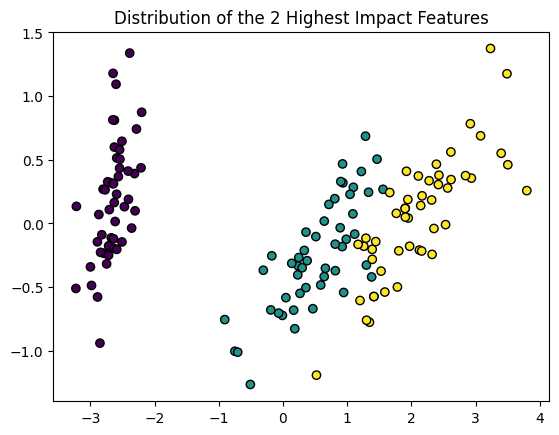

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

scatter = plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, edgecolor="black")
plt.title('Distribution of the 2 Highest Impact Features')

In this dataset, each variable has its corresponding label attached to it, making it easy to see how these 2 features end up distributing the data. The axis values are not important in this diagram as it is easy to perceive the different groupings of irises.

## Part 2: Clustering Algorithms

Now comes the hard part. How do we approach automating the process of identifying these clusters? Depending on what information we start off with, in this case how many clusters there are in the data, we may end up using different methods.

### 1. K-means clustering vs. Spectral clustering

K-means clustering is a very lightweight, fast, and flawed algorithm used in many real world applications.

Spectral clustering is quite heavy duty, slow, but highly accurate especially in image recognition.

C:\Users\dyan0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dyan0\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Spectral Clustering')

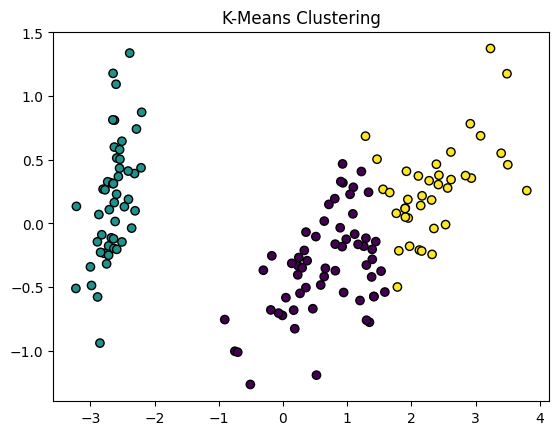

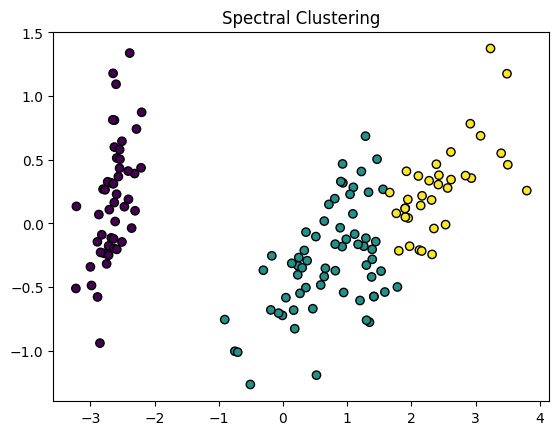

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)
Y_pred = kmeans.fit_predict(X_reduced)
fig = plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y_pred, edgecolor="black")
plt.title('K-Means Clustering')

sc = SpectralClustering(n_clusters=3)
Y_pred = sc.fit_predict(X_reduced)
fig = plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y_pred, edgecolor="black")
plt.title('Spectral Clustering')

However, despite the differences in these algorithms, they have very similar distributions. This outlines the limited scope of this particular dataset, however examples of the differences in performance can be seen in the following table provided by sklearn. Look at the 1st column "MiniBatch KMeans", compare it to the 4th column "Spectral Clustering", and see how each performs with different data distributions.

![alt text](<sklearn clustering algoirthms.png>)

### 2. DBSCAN and unknown clusters

Let's say you are using data without the luxury of labels, i.e. you do not know how many clusters it should have and no way of computationally differentiating between the variables on the chart. Then we use clustering algorithms like DBSCAN or OPTICS which do not need to know n_clusters. In this case we will focus on DBSCAN as it is orders of magnitude faster than OPTICS and has a similar clustering in this dataset.

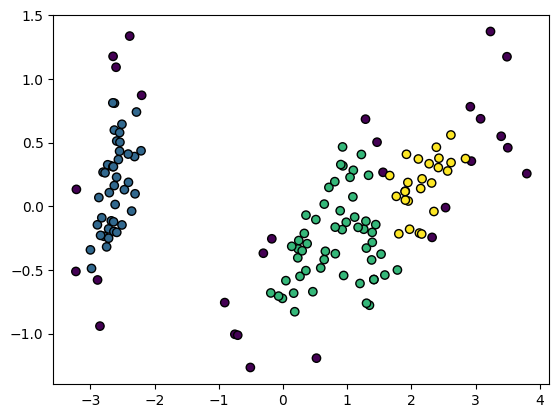

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=5)
dbscan.fit(X_reduced)
Y_pred = dbscan.fit_predict(X_reduced)
fig = plt.figure()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y_pred, edgecolor="black")

The downside of these algorithms are that they introduce outliers which are points that do not meet the criteria set by the data scientist to classify them as part of a cluster. The upside is that they are far more flexible than n_clusters dependent algorithms and perform better than nearly all of them (one of the few exceptions being spectral clustering which we have covered)